In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import hddm

C:\Users\Tejas\anaconda3\lib\site-packages\IPython\parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [2]:
data = hddm.load_csv('RTs.csv')
errors = hddm.load_csv('Curvature_Errors.csv')

In [3]:
data['response'] = (errors['Errors'] < 20/90).astype(int)

In [4]:
data = data.rename(columns={'Participant_Id':'subj_idx', 'ITs':'rt'})

In [41]:
m = hddm.HDDM(data, 
              depends_on = {'v': ['Block', 'Rotation', 'Emphasis'],
                            'a': ['Block', 'Rotation', 'Emphasis']},
              p_outlier = 0.05,
              informative = False
             )

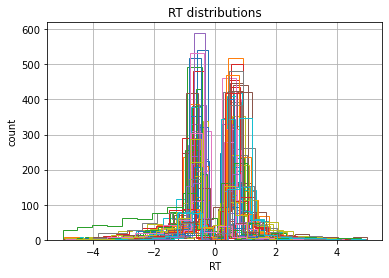

In [38]:
data1 = hddm.utils.flip_errors(data[data['rt'] < 5])

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data1.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


In [42]:
m.find_starting_values()

/home/vm01/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [43]:
m.sample(5000, burn = 1000, dbname='traces_1.db', db = 'pickle')

 [-----------------100%-----------------] 5001 of 5000 complete in 18328.7 sec

In [2]:
m = hddm.load('hddm_1')

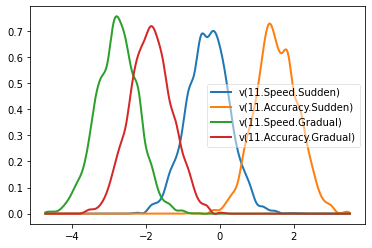

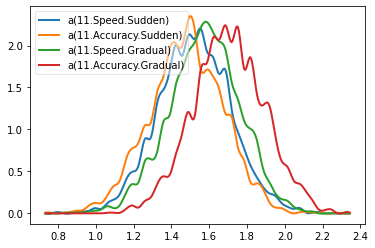

In [8]:
block = 11
vblock = m.nodes_db.node[['v('+str(block)+'.Speed.Sudden)', 'v('+str(block)+'.Accuracy.Sudden)', 'v('+str(block)+'.Speed.Gradual)', 'v('+str(block)+'.Accuracy.Gradual)']]
ablock = m.nodes_db.node[['a('+str(block)+'.Speed.Sudden)', 'a('+str(block)+'.Accuracy.Sudden)', 'a('+str(block)+'.Speed.Gradual)', 'a('+str(block)+'.Accuracy.Gradual)']]
hddm.analyze.plot_posterior_nodes(vblock),
hddm.analyze.plot_posterior_nodes(ablock)


In [15]:
print("P_v(11.Accuracy.Sudden > 11.Speed.Gradual) = ", (vblock[1].trace() > vblock[3].trace()).mean())

P_v(11.Accuracy.Sudden > 11.Speed.Gradual) =  1.0
